In [1]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [2]:
dice_data = np.array([1,2,3,4,5,6])

In [3]:
print('1つだけランダムに抽出', np.random.choice(dice_data, 1))

1つだけランダムに抽出 [5]


In [4]:
for i in range(1, 10):
    print('1つだけランダムに抽出', np.random.choice(dice_data, 1))

1つだけランダムに抽出 [6]
1つだけランダムに抽出 [1]
1つだけランダムに抽出 [4]
1つだけランダムに抽出 [4]
1つだけランダムに抽出 [4]
1つだけランダムに抽出 [2]
1つだけランダムに抽出 [4]
1つだけランダムに抽出 [6]
1つだけランダムに抽出 [3]


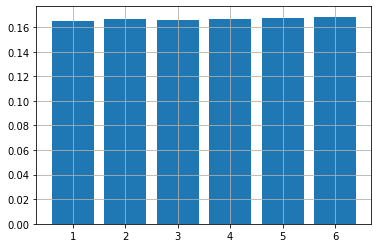

In [13]:
calc_steps = 100000
dice_rolls = np.random.choice(dice_data, calc_steps)
prob_data = np.array([])
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i])/calc_steps
    prob_data = np.append(prob_data, p)

plt.bar(dice_data, prob_data)
plt.grid(True)

In [15]:
coin_result = np.array([0,1])
prob_be_data = np.array([])
coin_data = np.random.choice(coin_result, 1000)

for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)


0 が出る確率 0.487
1 が出る確率 0.513


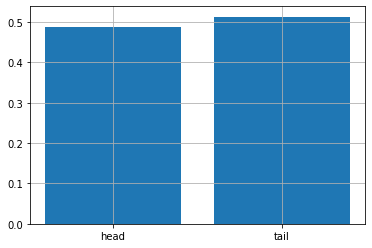

In [17]:
    plt.bar(np.unique(coin_data), prob_be_data, align='center')
plt.xticks([0,1], ['head', 'tail'])
plt.grid(True)

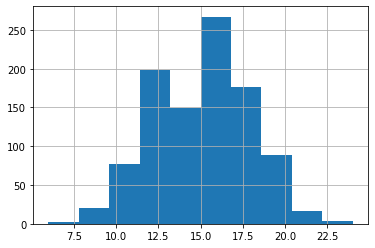

In [29]:
np.random.seed(0)

x = np.random.binomial(30, 0.5, 1000)
# 30回コイントスをして成功数をカウントする試行を1000回行った後の値の分布
plt.hist(x)
plt.grid(True)

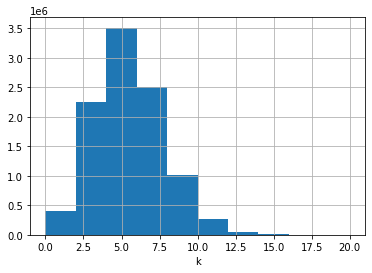

In [39]:
x = np.random.poisson(5, 10000000)
#単位時間ごとに発生する回数がn回の現象がk回起きる確率をm回計算する
# 例えば1時間（任意の単位時間）あたり5回発生するとか、
plt.xlabel('k')
plt.hist(x)
plt.grid(True)

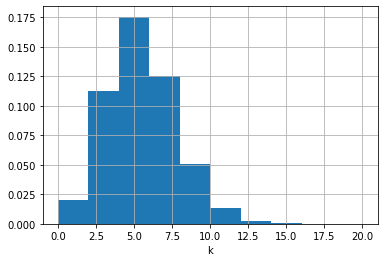

In [42]:
plt.xlabel('k')
plt.hist(x, density=True)
plt.grid(True)
# 単位時間ごとに発生する回数が5回の事象が5回起きる確率は0.175

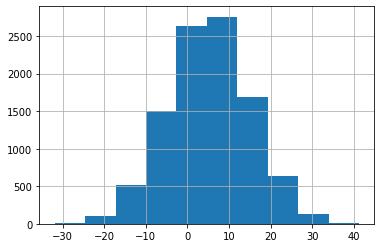

In [43]:
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

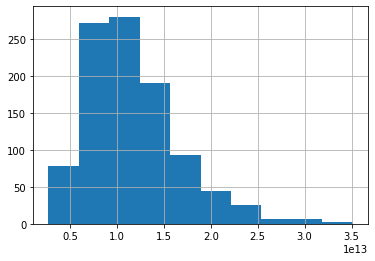

In [46]:
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)
# 確率変数 Y=lnX (=logeX) が正規分布に従うとき，その真数である確率変数 X が従う確率分布を対数正規分布 (log-normal distribution) という．
# 所得の分布のような低い方には限度があるが高い方には限度がないような事象のモデル化に使われる．
# https://data-science.gr.jp/theory/tpd_log_normal_distribution.html

In [47]:
import requests, zipfile
from io import StringIO
import io
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

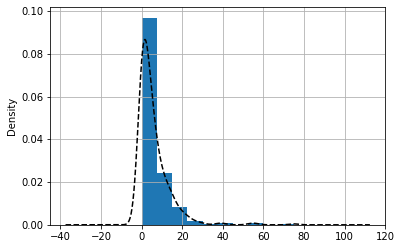

In [49]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.absences.plot(kind='kde', style='k--')
# scipy ベースのgaussian KDE
# https://vaaaaaanquish.hatenablog.com/entry/2017/10/29/181949
student_data_math.absences.hist(density=True)
plt.grid(True)

In [50]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [52]:
x, y = np.mgrid[10:100:2, 10:100:2]
print(x)
print(y)

[[10 10 10 ... 10 10 10]
 [12 12 12 ... 12 12 12]
 [14 14 14 ... 14 14 14]
 ...
 [94 94 94 ... 94 94 94]
 [96 96 96 ... 96 96 96]
 [98 98 98 ... 98 98 98]]
[[10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 ...
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]
 [10 12 14 ... 94 96 98]]


In [53]:
pos = np.empty(x.shape + (2, ))
pos[:, :, 0] = x
pos[:, :, 1] = y
print(pos)

[[[10. 10.]
  [10. 12.]
  [10. 14.]
  ...
  [10. 94.]
  [10. 96.]
  [10. 98.]]

 [[12. 10.]
  [12. 12.]
  [12. 14.]
  ...
  [12. 94.]
  [12. 96.]
  [12. 98.]]

 [[14. 10.]
  [14. 12.]
  [14. 14.]
  ...
  [14. 94.]
  [14. 96.]
  [14. 98.]]

 ...

 [[94. 10.]
  [94. 12.]
  [94. 14.]
  ...
  [94. 94.]
  [94. 96.]
  [94. 98.]]

 [[96. 10.]
  [96. 12.]
  [96. 14.]
  ...
  [96. 94.]
  [96. 96.]
  [96. 98.]]

 [[98. 10.]
  [98. 12.]
  [98. 14.]
  ...
  [98. 94.]
  [98. 96.]
  [98. 98.]]]


In [55]:
rv = multivariate_normal([50,50], [[100,0], [0,100]])
z = rv.pdf(pos)
print(z)

[[1.791e-10 3.907e-10 8.189e-10 ... 3.338e-11 1.357e-11 5.301e-12]
 [3.907e-10 8.523e-10 1.786e-09 ... 7.282e-11 2.961e-11 1.156e-11]
 [8.189e-10 1.786e-09 3.744e-09 ... 1.526e-10 6.205e-11 2.424e-11]
 ...
 [3.338e-11 7.282e-11 1.526e-10 ... 6.221e-12 2.529e-12 9.880e-13]
 [1.357e-11 2.961e-11 6.205e-11 ... 2.529e-12 1.028e-12 4.017e-13]
 [5.301e-12 1.156e-11 2.424e-11 ... 9.880e-13 4.017e-13 1.569e-13]]


/var/folders/wn/tgsbbxzs5xb2vtj7vsvs3qyh0000gn/T/ipykernel_18372/697984007.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


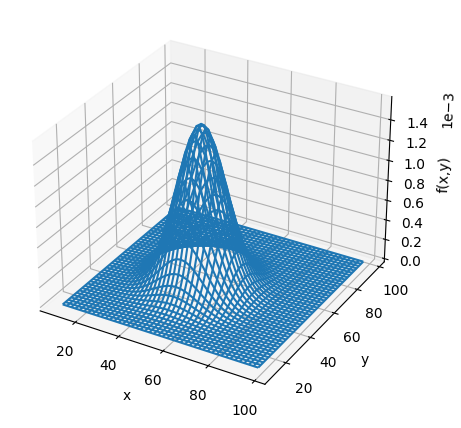

In [63]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
#fig.add_axes(ax)

ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

[   2    8   12   15   17   19   23   27   31   32   37   38   40   42
   46   50   52   54   59   65   71   72   73   75   76   82   86   92
   95   98   99  102  106  108  114  120  124  128  134  139  140  143
  146  151  154  156  157  162  166  170  173  174  180  185  191  195
  196  202  207  211  217  222  226  232  233  234  236  237  240  243
  249  254  260  263  269  271  272  276  281  282  286  291  296  299
  303  306  312  314  316  319  324  329  333  338  341  345  348  354
  359  362  366  371  374  376  379  380  381  382  383  385  390  395
  397  402  404  408  414  416  421  424  425  431  435  441  447  448
  452  458  460  463  467  470  472  478  484  489  493  495  501  503
  507  512  513  519  523  525  526  531  534  540  544  546  547  549
  555  558  560  562  568  571  577  582  585  588  592  597  602  604
  606  607  611  616  619  622  623  625  627  632  635  639  641  646
  649  650  651  652  653  654  657  662  665  670  675  678  682  688
  692 

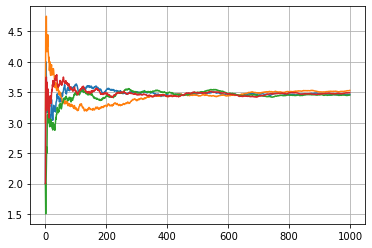

In [65]:
calc_times = 1000
sample_array = np.array([1,2,3,4,5,6])
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    print(p)
    print(number_cnt)
    plt.plot(p / number_cnt)
    plt.grid(True)

In [72]:
def function_central_theorem(N):
    sample_array = np.array([1,2,3,4,5,6])
    number_cnt = np.arange(1, N+1) * 1.0
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
    
    plt.hist(mean_array)
    plt.grid(True)

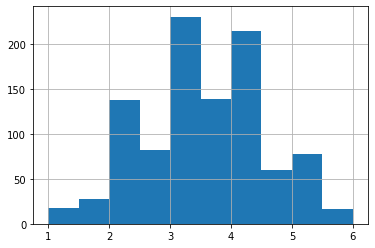

In [73]:
function_central_theorem(3)

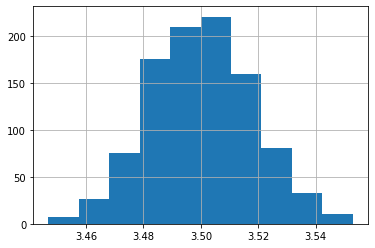

In [74]:
function_central_theorem(10000)

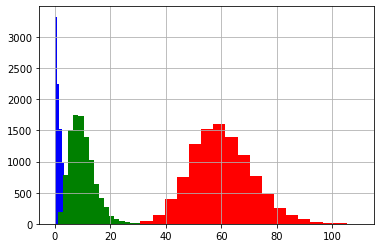

In [83]:
for df, c in zip([2,10,60], 'bgr'):
    x = np.random.chisquare(df, 10000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

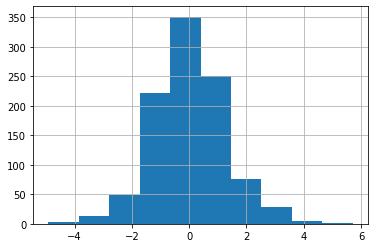

In [85]:
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

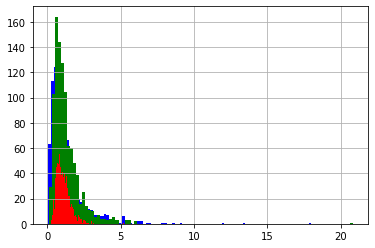

In [86]:
for df, c in zip([(6,7), (10,10), (20,25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

In [87]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_por = pd.read_csv('student-por.csv', sep=';')

student_data_merge = pd.merge(student_data_math, student_data_por,
                             on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                            suffixes=('_math', '_por'))

In [88]:
print('G1: 数学の成績平均', student_data_merge.G1_math.mean())
print('G1: ポルトガル語の成績平均', student_data_merge.G1_por.mean())

G1: 数学の成績平均 10.861256544502618
G1: ポルトガル語の成績平均 12.112565445026178


In [98]:
from scipy import stats
from decimal import Decimal
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p-value: {:.18f}'.format(p))

p-value: 0.000000000000000165
